# Audio Decoder in DALI

This tutorial shows how to load and decode audio data using DALI. We will use a simple example from Speech Commands Data Set. While this dataset consists of samples in .wav format, the following procedure can be used for most well-known digital audio coding formats, including WAV, FLAC, and OGG (both OGG Vorbis and OGG Opus).

## Step-by-Step Guide
1. Let's start by importing DALI and a handful of utilities.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

import nvidia.dali.experimental.dynamic as ndd

audio_files = Path("../../data/audio")

2. Next, we need to load data from disk (or any other source). [readers.File](../../../dali_dynamic/operations/nvidia.dali.experimental.dynamic.readers.File.html) is able to load data, as well as its labels. For more information, refer to the documentation. Furthermore, similarly to image data, you can use other reader operators that are specific for a given dataset or a dataset format (see [readers.Caffe](../../../dali_dynamic/operations/nvidia.dali.experimental.dynamic.readers.Caffe.html)). After loading the input data, we decode the audio. The [decoders.audio](../../../dali_dynamic/operations/nvidia.dali.experimental.dynamic.decoders.audio.html) operator is able to decode most of the well-known audio formats.

<div class="alert alert-info">

   Note<br>

   Please remember to pass the proper data type (argument `dtype`) to the operator. Supported data types can be found in the documentation. If you have 24-bit audio data and you set `dtype=ndd.int16`, it will result in losing some information from the samples. The default `dtype` for this operator is `ndd.int16`.
</div>

In [2]:
reader = ndd.readers.File(file_root=audio_files)
encoded, _ = reader()
audio, sr = ndd.decoders.audio(encoded, dtype=ndd.int16)

Outputs from [decoders.audio](../../../dali_dynamic/operations/nvidia.dali.experimental.dynamic.decoders.audio.html) consist of a tensor with the decoded data, as well as some metadata (e.g. sampling rate). On top of that, `decoders.audio` returns data in interleaved format, so we need to flatten the output tensor to properly display it. Here's how to do that:

Sampling rate: 16000.0 [Hz]
Audio data: [[  -5]
 [ -95]
 [-156]
 ...
 [ 116]
 [ 102]
 [  82]]
Audio data flattened: [  -5  -95 -156 ...  116  102   82]


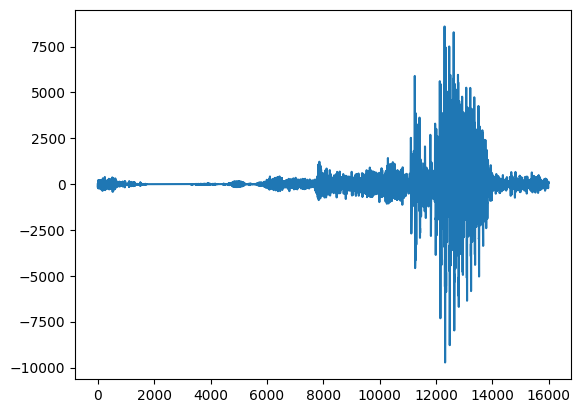

In [3]:
audio_data = np.asarray(audio)
sampling_rate = np.asarray(sr)
print("Sampling rate:", sampling_rate, "[Hz]")
print("Audio data:", audio_data)
audio_data = audio_data.flatten()
print("Audio data flattened:", audio_data)
plt.plot(audio_data)
plt.show()

## Verification

Let's verify that `decoders.audio` actually works. This method can also come in handy for debugging, in case something doesn't go as planned. 

We will use an external tool to decode the data and compare the results against data decoded by DALI.

<div class="alert alert-warning">

   Warning<br>

   The following cell requires `simpleaudio` to be installed. This can be done with:
   
   ```console
   $ python3 -m pip install simpleaudio
   ```

   Detailed installation instructions can be found in the [simpleaudio documentation](https://simpleaudio.readthedocs.io/en/latest/installation.html#linux-dependencies).
</div>

src: simpleaudio
shape:  (16000,)
data:  [  -5  -95 -156 ...  116  102   82]


src: DALI
shape:  (16000,)
data:  [  -5  -95 -156 ...  116  102   82]

Are the arrays equal? YES


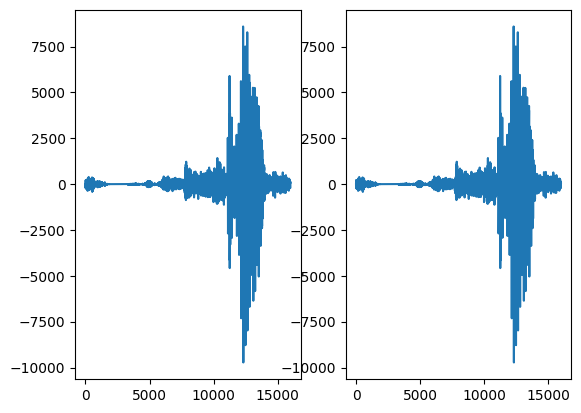

In [4]:
import simpleaudio as sa

wav = sa.WaveObject.from_wave_file("../../data/audio/wav/three.wav")
three_audio = np.frombuffer(wav.audio_data, dtype=np.int16)

print("src: simpleaudio")
print("shape: ", three_audio.shape)
print("data: ", three_audio)
print("\n")
print("src: DALI")
print("shape: ", audio_data.shape)
print("data: ", audio_data)
print(
    "\nAre the arrays equal?",
    "YES" if np.all(audio_data == three_audio) else "NO",
)

fig, ax = plt.subplots(1, 2)
ax[0].plot(three_audio)
ax[1].plot(audio_data)
plt.show()